# Report02 - Nathan Yee

This notebook contains report02 for computational baysian statistics fall 2016

MIT License: https://opensource.org/licenses/MIT

In [1]:
import numpy as np

import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Beta, MakeMixture
import thinkplot

% matplotlib inline

## Original type 1 - Multi Colored Pens
### My problem, solved with Matthew Beaudouin

Suppose you have a black, violet, red, and green pen. Each pen is identifiable by its colored cap or colored ink, For example, the red pen contains a red cap and red ink. The colored cap is visible, but the ink's color can only be seen on paper. Suppose you randomly mix up the pen's caps such that every cap has an equal probability of being on any colored ink. Later that day, you use the black capped pen and the ink is not black.  What is the probability that the red capped pen has red ink?

To make naming of the long hypotheses easier, I will list a simple naming convention below.  
B: Black  
V: Violet  
R: Red  
G: Green  
c: cap  
i: ink  
n: not  

So BcnBi stands for: "Black cap not Black ink"

### Solution 1 - Two Hypotheses

This problem can be solved with either two or four hypotheses. We will start with two hypotheses:  
hypo 1: The red cap has red ink  
hypo 2: The red cap does not have red ink  

In [2]:
class Pens2(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`. In this case, we will only
        update a single time with a single piece of data. This function servs as a place
        for calculating likelihoods
        
        data: BcnBi
        hypo: RcRi, RcnRi
        
        returns: float
        """
        if hypo == 'RcRi':
            return 2/3
        if hypo == 'RcnRi':
            return 7/9
        else:
            return 0 # hypotheses are inputted incorectly

When we have two hypotheses, calculating the likelihood is a little bit tricky.  
For our first hypothesis, RcRi, the probability that the black cap does not have black ink is 2/3. This is because two (G, V) out of 3 (G, V, B) pens are available.  
For the second hypothesis, RcnRi, the probability that the black cap does not have black ink is 7/9. To see why, let's break it up into 3 scenarios, the red cap has a violet, green, or black cap. If RcVi, then the black cap could have red, black or green ink (2 out of 3 pens). If RcGi, then the black cap could have red, black, or violet ink (2 our of three pens). If RcBi, then the black cap could have red, green or violet ink (3 out of 3 pens). In total, if RcnRi, then the probability that the black cap does not have black ink is (2 + 2 + 3)/(3 + 3 + 3) = 7/9

In [3]:
pens2 = Pens2()
pens2['RcRi'] = 1  # possible ink colors: R
pens2['RcnRi'] = 3 # possible ink colors: V, G, B

In [4]:
pens2.Normalize()
pens2.Print()

RcRi 0.25
RcnRi 0.75


In [5]:
pens2.Update('BcnBi')
pens2.Print()

RcRi 0.2222222222222222
RcnRi 0.7777777777777778


After a single update, the probability that the red capped pen has red ink has fallen from 25% -> 22.2%

### Solution 1 - Four Hypotheses
In the previous two hypotheses solution, making the likelihood function was somewhat difficult. We will redo the problem with four hypotheses to have a simpler likelihood function.

In [6]:
class Pens4(Suite):

    def Likelihood(self, data, hypo):
        """Computes the likelihood of `data` given `hypo`. In this case, we will only
        update a single time with a single piece of data. This function servs as a place
        for calculating likelihoods
        
        data: BcnBi
        hypo: RcRi, RcVi, RcGi, RcBi
        
        returns: float
        """
        if hypo == 'RcRi':
            return 2/3
        if hypo == 'RcVi':
            return 2/3
        if hypo == 'RcGi':
            return 2/3
        if hypo == 'RcBi':
            return 3/3
        else:
            return 0 # hypotheses are inputted incorectly

When we have four hypotheses, calculating the likelihood is much easier.  
'RcRi': black cap could have violet, green, or black  
'RcVi': black cap could have red, green, or black  
'RcGi': black cap could have red, violet or black  
'RcBi': black cap could have red, violet, or green  

In [7]:
hypos = ['RcRi', 'RcVi', 'RcGi', 'RcBi']
pens4 = Pens4(hypos)
pens4.Print()

RcBi 0.25
RcGi 0.25
RcRi 0.25
RcVi 0.25


In [8]:
pens4.Update('BcnBi')
pens4['RcRi']

0.2222222222222222

It turns out, it does not matter how many hypotheses we start with. After seeing that the black cap does not have black ink, the probability of having red cap red ink comes out to be 22.2%

## Unfair coin using various betas as informative priors

David MacKay poses an interesting coin question. I will solve it using various betas as informative priors.  


In Information Theory, Inference, and Learning Algorithms, David MacKay poses this problem:  

A statistical statement appeared in “The Guardian" on Friday January 4, 2002:
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ‘It looks very suspicious to me,’ said Barry Blight, a statistics lecturer at the London School of Economics. ‘If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.’  

But do these data give evidence that the coin is biased rather than fair?

### 4 beta functions
We will try 4 beta functions where (alpha, beta) = (1,1), (1,2), (2,1), (2,2)  

Visualize the informed priors below. These 4 informed priors do not resemble each other and should give us a decent idea as to how various betas will behave.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


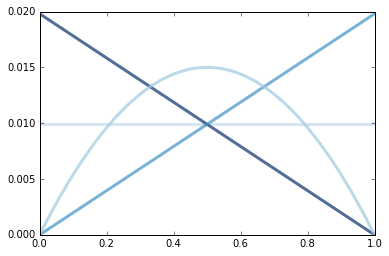

In [9]:
coins = []
for i in range(3):
    for j in range(3):
        coins.append(Beta(i,j))

for coin in coins:
    thinkplot.Pdf(coin.MakePmf())

Start updates with 10 heads and 10 tails. We can see that the informed priors cluster closely to each other with just a moderate amount of data.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


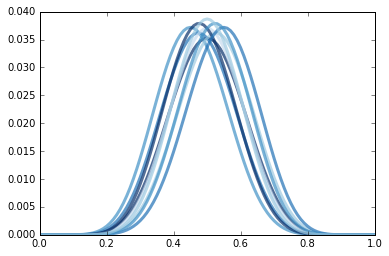

In [10]:
for coin in coins:
    coin.Update((10,10))
for coin in coins:
    thinkplot.Pdf(coin.MakePmf())

Next, we will update with the rest of the data. Now we can see that the informed priors barely make a difference. We have "swamped" the priors with a large amount of data.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


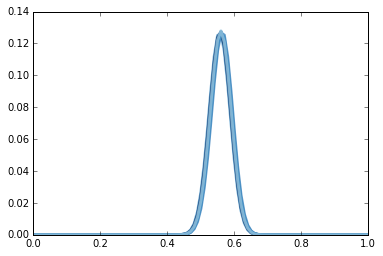

In [11]:
for coin in coins:
    coin.Update((130,100))
for coin in coins:
    thinkplot.Pdf(coin.MakePmf())

### Many extreme betas
Now, let's try with an extreme range of betas to further illustrate how informed priors react to moderate and large Bayesian updates. An extreme beta will be defined as an uninformed prior that is vastly different than what we know to be our expected outcome.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


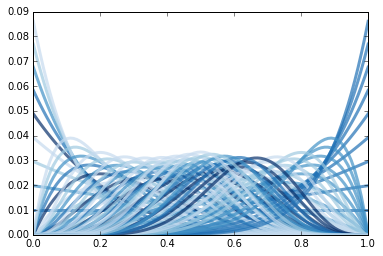

In [12]:
coins2 = []
for i in range(10):
    for j in range(10):
        coins2.append(Beta(i,j))
for coin in coins2:
    thinkplot.Pdf(coin.MakePmf())

Initial update with a moderate amount of data. Notice that with the large extreme range of betas, we can see that an inaccurate informed beta can be detrimental to meaningful results.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


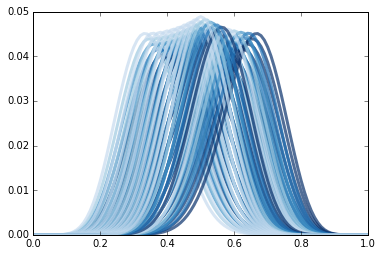

In [13]:
for coin in coins2:
    coin.Update((10,10))
for coin in coins2:
    thinkplot.Pdf(coin.MakePmf())

Now, lets see what happens when we "swamp" the prior with a large amount of data.

/home/nathan/olin/fall2016/ThinkBayes2/code/thinkplot.py:115: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


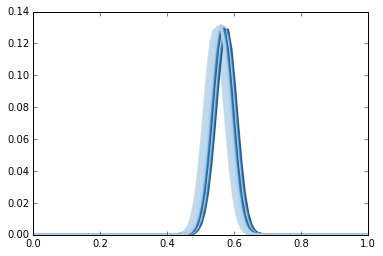

In [14]:
for coin in coins2:
    coin.Update((130,100))
for coin in coins2:
    thinkplot.Pdf(coin.MakePmf())

Low and behold, with a large amount of data, all of our extreme betas have converged to almost the same set of probabilities. It is nice to see that with enough data, we can almost always arrive at a meaningful conclusion.

## Kim Rhode 

Allen Downey proposed the following problem

>At the 2016 Summer Olympics in the Women's Skeet event, Kim Rhode faced Wei Meng in the bronze medal match. They each hit 15 of 25 targets, sending the match into sudden death. In the first round, both hit 1 of 2 targets. In the next two rounds, they each hit 2 targets. Finally, in the fourth round, Rhode hit 2 and Wei hit 1, so Rhode won the bronze medal, making her the first Summer Olympian to win an individual medal at six consecutive summer games.  

>But after all that shooting, what is the probability that Rhode is actually a better shooter than Wei? If the same match were held again, what is the probability that Rhode would win?

In the case of the problem above, there is a 60% chance that Rhode is actually a better shooter than Wei. If they had a rematch, Rhode would win 50% of the time, tie 10% of the time (which would continue onto a win or loss, and lose 40% of the time.

However, what if we had two players that are not so similar. In theory, a professional player should beat an average player almost every time. Let's see what happens if Rhode scores 15 while an average player scores 11 (the lowest qualifying player averaged 11.8 targets over 5 games). We will start both players with a (4, 3) beta distribution. (Note: the other point of this question is to see how computational Bayes behaves when it compares two players in a match that isn't so close)

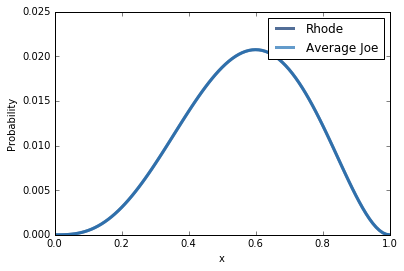

In [15]:
rhode = Beta(4, 3, label='Rhode')
joe = Beta(4, 3, label='Average Joe')
thinkplot.Pdf(rhode.MakePmf())
thinkplot.Pdf(joe.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

Now, we will update each player with their shots for the game. We see that this update has pushed the two distributions fairly far apart. However, at this point, it is difficult to see exactly how the two players compare.

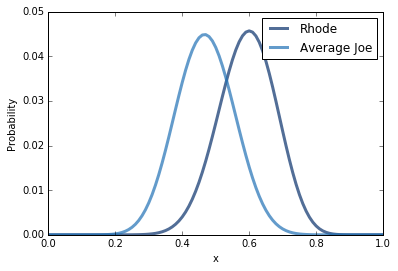

In [16]:
rhode.Update((15, 10))
joe.Update((11,14))
thinkplot.Pdf(rhode.MakePmf())
thinkplot.Pdf(joe.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

Next, we will calculate the probability that Rhode is better than Joe. We will do this with a simulation.

In [17]:
pmf1 = rhode.MakePmf(1000)
pmf2 = joe.MakePmf(1000)
pmf1.ProbGreater(pmf2)

0.8447056348178685

Above, based on the results of a single game, we calculate that Rhode is a better shooter than Joe 84.5% of the time. But, what happens when we calculate the results of future rematches. We will do this using binomial mixtures.

In [18]:
from thinkbayes2 import MakeMixture

def MakeBinomialMix2(pmf):
    """
    MakeBinomialMix2 is used to make a binomial mixture specific to skeet
    
    Args:
        pmf (object): a pmf object used in the thinkbayes2 module
    """
    binomials = Pmf()
    for x, prob in pmf.Items():
        binom = thinkbayes2.MakeBinomialPmf(n=25, p=x) #n=25 because skeet allows 25 shots
        binomials[binom] = prob
    return MakeMixture(binomials)

In [19]:
rhode_rematch = MakeBinomialMix2(rhode.MakePmf())
joe_rematch = MakeBinomialMix2(joe.MakePmf())
rhode_rematch.ProbGreater(joe_rematch), rhode_rematch.ProbLess(joe_rematch)

(0.71643254529406131, 0.21615585369266879)

So, if Rhode and Joe were to have rematches: Rhode would win 71.6% of games, tie\* 6.8% of games, and lose 21.6% of games. However, we also know that Rhode is the first Summer Olympian to win an individual medal at six consecutive summer games. This makes it extremely unlikely that Rhode will lose 21.6% of games to an average player, who we will call joe. So, where did we go wrong, do we not have enough data? Is there insufficient data? Let's test the same procedure where we start with the assumption that Rhode is an extremely good player (alpha = 10, beta = 6) and Joe is much worse (alpha = 6, beta = 10).

\* Can't really tie in skeet. Both players continue playing with rounds of two shots.

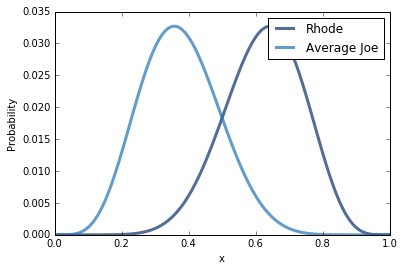

In [20]:
rhode2 = Beta(10, 6, label='Rhode')
joe2 = Beta(6, 10, label='Average Joe')
thinkplot.Pdf(rhode2.MakePmf())
thinkplot.Pdf(joe2.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

Above we notice that the graphs have a bit of overlap, but Rhode should be a much better player. Next we will update with our 25 data points and see how much the graphs move.

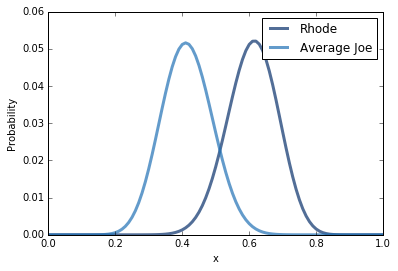

In [21]:
rhode2.Update((15, 10))
joe2.Update((11, 14))
thinkplot.Pdf(rhode2.MakePmf())
thinkplot.Pdf(joe2.MakePmf())
thinkplot.Config(xlabel='x', ylabel='Probability')

After the updates, we see that the pmfs overlap much less, but still have some overlap. Rhode peaks slightly above 60% while Joe peaks at around 40%. Next, we calculate the probability that Rhode is a better shooter than Joe.

In [22]:
pmf1 = rhode2.MakePmf(1000)
pmf2 = joe2.MakePmf(1000)
pmf1.ProbGreater(pmf2)

0.9631839532978865

We calculate a 96.3% chance that Rhode is a better shooter than Joe. This seems like a really good result given that the best Skeet shooter in the world should be significantly better than an average player. Finally, we will see what happens if the two have rematches.

In [23]:
rhode2_rematch = MakeBinomialMix2(rhode2.MakePmf())
joe2_rematch = MakeBinomialMix2(joe2.MakePmf())
rhode2_rematch.ProbGreater(joe2_rematch), rhode2_rematch.ProbLess(joe2_rematch)

(0.8418175021884835, 0.11025798478916181)

Based on the above calculations, if Rhode and Joe were to have rematches, Rhode would win 84.2% of the time, tie 4.8% of the time, and lose 11.0% of the time. This does not really make sense because Rhode is a 6 time Olympic champion. My intuition tells me that we do not have nearly enough data from a single match to narrow the pmfs enough such that they don't overlap.

## Original(ish) type 2 - Two faulty coins

>In Information Theory, Inference, and Learning Algorithms, David MacKay poses this problem:

>>A statistical statement appeared in “The Guardian" on Friday January 4, 2002:
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ‘It looks very suspicious to me,’ said Barry Blight, a statistics lecturer at the London School of Economics. ‘If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.’

>My variation:

>>Given two faulty coins. Coin 1 came up heads 140 times and tails 110 times. Coin 2 came up heads 120 times and tails 123 times. If we flip one of the coins at random, what is the probability that we get heads? In addition, if we do get heads, what is the probability we get coin 1?

After 250 Bayesian updates, the choice of an informed vs uninformed prior barely makes a difference. In this case we are looking at relative values so it makes makes sense to start them equal. We will choose a beta of (2,2) to represent our informed hypotheses.

### Part 1 - If we flip one of the coins at random, what is the probability that we get heads?

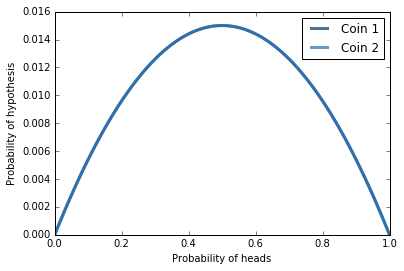

In [24]:
coin1 = Beta(2, 2, label='Coin 1')
coin2 = Beta(2, 2, label='Coin 2')

thinkplot.Pdf(coin1.MakePmf())
thinkplot.Pdf(coin2.MakePmf())
thinkplot.Config(xlabel='Probability of heads', ylabel='Probability of hypothesis')

Update the coins with the data.

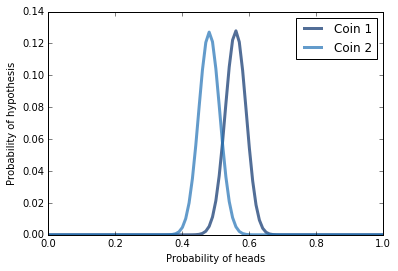

In [25]:
coin1.Update((140,110))
coin2.Update((120,130))
thinkplot.Pdf(coin1.MakePmf())
thinkplot.Pdf(coin2.MakePmf())
thinkplot.Config(xlabel='Probability of heads', ylabel='Probability of hypothesis')

To answer the first question, we just need to add together the pmf's of the beta objects. The plot shows the combined distribution.

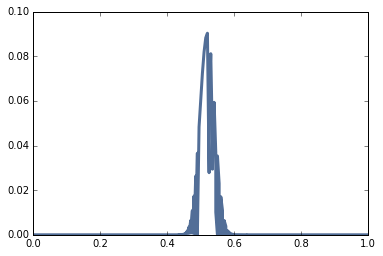

In [26]:
bothCoins = coin1.MakePmf()/2 + coin2.MakePmf()/2
thinkplot.Pdf(bothCoins)

Now sample from the new pmf to calculate the probability that a randomly selected coin will produce heads. We have essentially solved the problem of two coins, by reducing them to a single coin from which we can sample.

In [27]:
np.mean(bothCoins.Sample(1000))

0.52013999999999994

We have answered question 1. If we randomly flip one of the two coins, on average (for the range of possible coin probabilities), we will get heads 51.9% of the time. If we are interested in what possible probabilites of heads exist, we can look at a 90% credible interval.

In [28]:
bothCoins.CredibleInterval()

(0.48499999999999999, 0.55499999999999994)

90% of the time, if we pick one of the two coins, we expect the probability of it being heads to be between 48.5% and 55.5%. 

### Part 2 - If we do get heads, what is the probability we get coin 1?
We will use random sampling of the original coins to estimate the probability that a heads is produced by coin1 or coin2.

In [29]:
coin1HeadsIn1000 = np.sum(coin1.Sample(1000))
coin2HeadsIn1000 = np.sum(coin2.Sample(1000))

probHeadsFromCoin1 = coin1HeadsIn1000 / (coin1HeadsIn1000 + coin2HeadsIn1000)
print(probHeadsFromCoin1)

0.538006817996


If we flip one of the coins at random and get heads, there is a 53.7% chance that it came from coin1.